# IGNNet Tutorial 

- paper: https://arxiv.org/abs/2308.08945#
- code: https://github.com/amrmalkhatib/IGNNet/tree/main/source_code
- Description: Graph Neural Network (GNN) Model for Tabular Data
- I have modified some lines in `ignnet.py`

In [1]:
import os

# Set the OPENML_CONFIG_DIR environment variable
os.environ['OPENML_CONFIG_DIR'] = '/app/tmp/openml_config'

# Create the directory if it doesn't exist
os.makedirs('/app/tmp/openml_config', exist_ok=True)

# Verify that the environment variable is set correctly
print(os.environ['OPENML_CONFIG_DIR'])

/app/tmp/openml_config


In [2]:
import pandas as pd
import openml
import data_preprocess as dp

# Verify the OpenML configuration directory
#print(openml.config.cache_directory)

data_name = 'abalone_checkpoint_tutorial_1'

data = openml.datasets.get_dataset(720, download_data=True, \
            download_qualities=True, download_features_meta_data=True)

X, y, categorical_indicator, attribute_names = data.get_data(
    target=data.default_target_attribute, dataset_format="dataframe"
)

In [3]:
!pwd

/app/ignnet/tutorial


In [4]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 232.8 KB


In [6]:
y.head(),y.unique()

(0    N
 1    P
 2    P
 3    N
 4    P
 Name: binaryClass, dtype: category
 Categories (2, object): ['P' < 'N'],
 ['N', 'P']
 Categories (2, object): ['P' < 'N'])

In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4177 entries, 0 to 4176
Series name: binaryClass
Non-Null Count  Dtype   
--------------  -----   
4177 non-null   category
dtypes: category(1)
memory usage: 4.3 KB


# Data Preprocessing

In [8]:
nominal = [b for a, b in zip(categorical_indicator, attribute_names) if a]
encoded_data = pd.get_dummies(X, columns=nominal)

columns = encoded_data.columns
updates = {}
for col in columns:
    if any(x in col for x in set((',', '[', ']', '<', '>'))):
        updates[col] = col.replace(',', '_').replace('[', '_') \
                            .replace(']', '_').replace('<', 'less').replace('>', 'greater')
encoded_data = encoded_data.rename(columns=updates)

encoded_data.fillna(0, inplace=True)
encoded_data.tail()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_M,Sex_F,Sex_I
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,False,True,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,True,False,False
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,True,False,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,False,True,False
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,True,False,False


In [9]:
## Bool to Int
# List the boolean columns you want to convert
bool_columns = ['Sex_M', 'Sex_F', 'Sex_I']

encoded_data[bool_columns] = encoded_data[bool_columns].astype(int)

In [10]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Sex_M           4177 non-null   int64  
 8   Sex_F           4177 non-null   int64  
 9   Sex_I           4177 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 326.5 KB


In [11]:
columns,updates

(Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
        'Viscera weight', 'Shell weight', 'Sex_M', 'Sex_F', 'Sex_I'],
       dtype='object'),
 {})

In [12]:
encoded_data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_M', 'Sex_F', 'Sex_I'],
      dtype='object')

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 232.8 KB


In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4177 entries, 0 to 4176
Series name: binaryClass
Non-Null Count  Dtype   
--------------  -----   
4177 non-null   category
dtypes: category(1)
memory usage: 4.3 KB


In [15]:
y.head()

0    N
1    P
2    P
3    N
4    P
Name: binaryClass, dtype: category
Categories (2, object): ['P' < 'N']

In [16]:
# Example mapping
mapping = {'P': 1, 'N': 0}

# Handle categorical data appropriately
if y.dtype.name == 'category':
    y = y.cat.rename_categories(mapping)
else:
    y = y.replace(mapping)

print(y.head())

0    0
1    1
2    1
3    0
4    1
Name: binaryClass, dtype: category
Categories (2, int64): [1 < 0]


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

train_data, left_out, train_label, y_left_out = train_test_split(encoded_data, y, test_size=0.4, random_state=42)
test_data, dev_data, test_label, dev_label = train_test_split(left_out, y_left_out, test_size=0.5, random_state=42)

print(f'train shape: {train_data.shape}\n test shape: {test_data.shape}\n dev shape: {dev_data.shape}')

train shape: (2506, 10)
 test shape: (835, 10)
 dev shape: (836, 10)


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2506 entries, 542 to 860
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          2506 non-null   float64
 1   Diameter        2506 non-null   float64
 2   Height          2506 non-null   float64
 3   Whole weight    2506 non-null   float64
 4   Shucked weight  2506 non-null   float64
 5   Viscera weight  2506 non-null   float64
 6   Shell weight    2506 non-null   float64
 7   Sex_M           2506 non-null   int64  
 8   Sex_F           2506 non-null   int64  
 9   Sex_I           2506 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 215.4 KB


In [19]:
normalized_train_data = dp.min_max_normalize(train_data, train_data)

normalized_test_data = dp.min_max_normalize(test_data, train_data)

normalized_dev_data = dp.min_max_normalize(dev_data, train_data)

## Build graph

- `adj_matrix` is a numpy array with `feature x feature` dimensions
- `index_to_name` is a dictionary

In [20]:
adj_matrix, index_to_name, name_to_index = dp.compute_adjacency_matrix(data=normalized_train_data, 
                                                                       self_loop_weight=20, threshold=0.2)

In [21]:
adj_matrix.shape, adj_matrix.dtype

((10, 10), dtype('float64'))

## Prep Trainset

In [22]:
#oversampled_data, oversampled_labels = \
#dp.oversample(normalized_train_data, train_label, oversampled_class=1, num_folds=2)

train = dp.transform_to_tensors(normalized_train_data, train_label, adj_matrix)

test = dp.transform_to_tensors(normalized_test_data, test_label, adj_matrix)

dev = dp.transform_to_tensors(normalized_dev_data, dev_label, adj_matrix)

In [23]:
from torch.utils.data import DataLoader
import torch

batch_size = 64

train_dataset = dp.Data(data=train)
val_dataset = dp.Data(data=dev)
test_dataset = dp.Data(data=test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

# Train IGNNet

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} device")
print(f"Using {torch.cuda.device_count()} GPUs!")
print(f"Torch Version: {torch.__version__} ")

Using cuda device
Using 2 GPUs!
Torch Version: 2.2.0+cu121 


In [25]:
device='cuda:1'

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

- `num_classes = 1 and 2` : one sigmoid output for single class prob with `BCELoss`
- `num_classes > 2` : softmax outputs with `MSELoss`, not logits with `CrossEntropyLoss`. This could be ..
- Since my problem is a binary classification, I may not be bothered by this potential `num_classes > 2` issue. 

In [27]:
%%time
import torch.nn as nn
from ignnet import train_model

gnn_model = train_model(input_dim=1,
            adj_matrix=adj_matrix, 
            index_to_name=index_to_name,
            train_dataloader=train_dataloader,
            val_dataloader=val_dataloader,
            data_name=data_name,
            num_classes=1,
            num_epochs=400,epoch_frequency=100,
            learning_rate=1e-03,
            normalize_adj=False,disablevalidtqdm=True,
            disabletraintqdm=True,disableepochtqdm=False,device=device)


 25%|██████████████████████████████▌                                                                                           | 100/400 [00:31<01:35,  3.13it/s]

Acc at dev is : 0.782
ROC is : 0.7828948874693775,  prec 0.7869751021924936,  recall 0.7828948874693775, f-score 0.7816355234076753
Acc at epoch : 100 is : 0.784118115901947, loss : 18.38200843334198


 50%|█████████████████████████████████████████████████████████████                                                             | 200/400 [01:03<01:03,  3.13it/s]

Acc at dev is : 0.791
ROC is : 0.7910055635689264,  prec 0.7921980516681514,  recall 0.7910055635689264, f-score 0.7905112927729976
Acc at epoch : 200 is : 0.7889066338539124, loss : 17.448335617780685


 75%|███████████████████████████████████████████████████████████████████████████████████████████▌                              | 300/400 [01:35<00:30,  3.30it/s]

Acc at dev is : 0.791
ROC is : 0.7911429356411842,  prec 0.7936727423889887,  recall 0.7911429356411841, f-score 0.7903023058146319
Acc at epoch : 300 is : 0.7972865104675293, loss : 17.090697020292282


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [02:07<00:00,  3.13it/s]

Acc at dev is : 0.794
ROC is : 0.7948119147377338,  prec 0.7983986837226549,  recall 0.7948119147377338, f-score 0.7937377713259468
Acc at epoch : 400 is : 0.8020750284194946, loss : 16.854583233594894
CPU times: user 1min 51s, sys: 16.9 s, total: 2min 8s
Wall time: 2min 8s


In [28]:
!pwd

/app/ignnet/tutorial


In [29]:
!ls /app/ignnet/tutorial

__pycache__				  abalone_exp.pickle
abalone_IGNNet.ipynb			  data_preprocess.py
abalone_checkpoint_tutorial_1		  ignnet.py
abalone_checkpoint_tutorial_1_exp.pickle  ognnet.py


In [30]:
!ls /app/ignnet/tutorial/abalone_checkpoint_tutorial_1

'epoch[107]-0.791.model'  'epoch[24]-0.763.model'   'epoch[59]-0.780.model'
'epoch[107]-0.791.optm'   'epoch[24]-0.763.optm'    'epoch[59]-0.780.optm'
'epoch[10]-0.753.model'   'epoch[2]-0.594.model'    'epoch[5]-0.741.model'
'epoch[10]-0.753.optm'	  'epoch[2]-0.594.optm'     'epoch[5]-0.741.optm'
'epoch[112]-0.793.model'  'epoch[30]-0.763.model'   'epoch[5]-0.748.model'
'epoch[112]-0.793.optm'   'epoch[30]-0.763.optm'    'epoch[5]-0.748.optm'
'epoch[119]-0.797.model'  'epoch[315]-0.781.model'  'epoch[62]-0.780.model'
'epoch[119]-0.797.optm'   'epoch[315]-0.781.optm'   'epoch[62]-0.780.optm'
'epoch[11]-0.749.model'   'epoch[31]-0.773.model'   'epoch[66]-0.782.model'
'epoch[11]-0.749.optm'	  'epoch[31]-0.773.optm'    'epoch[66]-0.782.optm'
'epoch[120]-0.799.model'  'epoch[323]-0.800.model'  'epoch[73]-0.764.model'
'epoch[120]-0.799.optm'   'epoch[323]-0.800.optm'   'epoch[73]-0.764.optm'
'epoch[12]-0.759.model'   'epoch[377]-0.781.model'  'epoch[75]-0.783.model'
'epoch[12]-0.759.optm'	 

## Evaluate the trained model on the test set

In [31]:
%%time
import torch.nn as nn
from ignnet import IGNNet
from tqdm import tqdm



#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = 1 
adj_matrix = torch.FloatTensor(adj_matrix)

gnn_model = IGNNet(input_dim, adj_matrix[0].shape[0], \
                   adj_matrix.to(device), 1, index_to_name).to(device)

torch.cuda.empty_cache()

gnn_model.load_state_dict(torch.load(f'{data_name}/epoch[315]-0.781.model'))

print('*** Testing : ****')
gnn_model.eval()

correct = 0
count = 0
count_2 = 0

list_prediction = []
list_pob_pred = []
y_test = []

for i, data in tqdm(list(enumerate(test_dataloader))):
    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = gnn_model(inputs)
    list_pob_pred.extend(outputs.tolist())

    preds = (outputs.reshape(-1) > 0.5) * 1

    list_prediction.extend(preds.tolist())

    count+= torch.sum(preds == labels.data)

    for i in range(len(preds)):
        if preds[i] == labels[i] == 1:
            count_2 += 1

    y_test.extend(labels.tolist())

    torch.cuda.empty_cache()


roc = roc_auc_score(y_test, list_pob_pred)
prec = precision_score(y_test, list_prediction, average='macro')
recall = recall_score(y_test, list_prediction, average='macro')
f_score = f1_score(y_test, list_prediction, average='macro')

print('AUC is : {},  prec {},  recall {}, f-score {}' .format(roc, prec, recall, f_score))

*** Testing : ****


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 235.79it/s]

AUC is : 0.8769193609606295,  prec 0.7839064163765359,  recall 0.7729345663250635, f-score 0.7736665695132614
CPU times: user 81.7 ms, sys: 28.3 ms, total: 110 ms
Wall time: 109 ms


# Explain one example

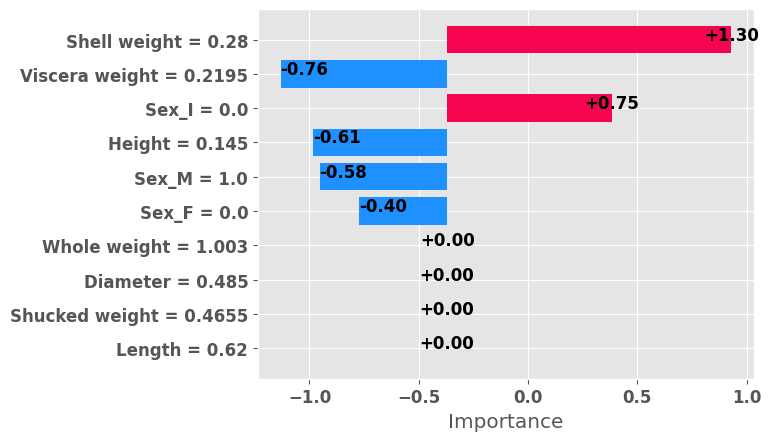

tensor([[0.3369]], device='cuda:1', grad_fn=<SigmoidBackward0>)

In [32]:
#num of features to use
top_n = 10

gnn_model.plot_bars(test[10][0].reshape(1, adj_matrix.shape[0], 1).to(device), test_data.iloc[0], top_n)
gnn_model.predict(test[10][0].reshape(1, adj_matrix.shape[0], 1).to(device))

# Interpretability Evaluation

In [33]:
importances = gnn_model.weights.cpu().detach().reshape(-1).numpy()

feature_global_importance = {}
for i, v in enumerate(importances):
    feature_global_importance[index_to_name[i]] = v

In [34]:
'''function to obtain feature scores from IGNNet model'''

def get_local_values(example, feature_global_importance, adj_matrix, index_to_name):
    array_to_use = np.array(example)    
    array = torch.FloatTensor(array_to_use).reshape(1, adj_matrix.shape[0], 1)
    local_importance = gnn_model.get_local_importance(array.to(device))[-1]

    names = []
    values = []
    for i, v in enumerate(local_importance):
        name = index_to_name[i]
        names.append(name)
        values.append(feature_global_importance[name]*v)
    return names, values

In [35]:
from sklearn.preprocessing import StandardScaler
from data_preprocess import BlackBoxWrapper

ss = StandardScaler()
ss.fit(normalized_train_data.to_numpy())

num_features = adj_matrix.shape[0]


bb = BlackBoxWrapper(gnn_model, num_features, ss, device)

def black_box(x, S):
    pred = bb(x, S)
    return pred.cpu().data.numpy()

In [36]:
'''
Evaluate a black-box model.
  x: input examples.
  S: coalitions.
'''

x = test_dataset[0][0]
x = x.reshape((1,x.shape[0])).numpy()

'''compute the feature scores on a vector of all features masked'''
S = np.zeros_like(x)
S = ss.inverse_transform(S)
_, null =  get_local_values(S, feature_global_importance, adj_matrix, index_to_name)

## Explain 500 examples and compare KernelSHAP to IGNNet after each iteration of data sampling

In [37]:
%%time
from tqdm import tqdm
import shapreg
import pickle
import os.path
from numpy.linalg import norm
from scipy.stats import spearmanr
import copy

if os.path.isfile(f'{data_name}_exp.pickle'):
    print('Loading saved explanations')

    with open(f'{data_name}_exp.pickle', 'rb') as file:
        all_instance_results_loaded = pickle.load(file)
        
    all_l2_distances = []
    all_cos_sim = []
    all_spearman_c = []

    for x, all_results in tqdm(all_instance_results_loaded):

        _, true_values = get_local_values(x, feature_global_importance, adj_matrix, index_to_name)
        
        instance_l2_dis = []
        instance_cos_sim = []
        spearman_c = []
        
        '''the Shapley values for an input x sum to the difference p(y=1 | x) - p(y=1)'''
        true_values = np.array(true_values) - null

        for i in list(all_results['iters']):

            knl_shp = all_results['values'][list(all_results['iters']).index(i)].reshape(-1)

            instance_l2_dis.append(norm(true_values - knl_shp))
            instance_cos_sim.append(np.dot(true_values, knl_shp)/(norm(true_values)*norm(knl_shp)))
            coef, p = spearmanr(true_values, knl_shp)
            spearman_c.append(coef)
            
        all_l2_distances.append(instance_l2_dis)
        all_cos_sim.append(instance_cos_sim)
        all_spearman_c.append(spearman_c)

else:
    
    all_l2_distances = []
    all_cos_sim = []
    all_instance_results = []
    all_spearman_c = []

    count = 1
    for x_, _ in tqdm(test_dataset):
        _, true_values = get_local_values(x_, feature_global_importance, adj_matrix, index_to_name)

        x = x_.reshape((1,x_.shape[0])).numpy()

        # Run KernelSHAP to convergence
        game_ = shapreg.games.PredictionGame(black_box, x)
        try:
            '''more examples are available here'''
            shap_values, all_results = shapreg.shapley.ShapleyRegression(
                game_, batch_size=16, n_samples=2000, paired_sampling=True, detect_convergence=False,
                bar=False, return_all=True)
        except:
            print('Singularity exception!')
            continue

        instance_l2_dis = []
        instance_cos_sim = []
        spearman_c = []

        true_values = np.array(true_values) - null

        for i in list(all_results['iters']):

            knl_shp = all_results['values'][list(all_results['iters']).index(i)].reshape(-1)

            instance_l2_dis.append(norm(true_values - knl_shp))
            instance_cos_sim.append(np.dot(true_values, knl_shp)/(norm(true_values)*norm(knl_shp)))
            coef, p = spearmanr(true_values, knl_shp)
            spearman_c.append(coef)
            
        all_l2_distances.append(instance_l2_dis)
        all_cos_sim.append(instance_cos_sim)
        all_spearman_c.append(spearman_c)

        all_instance_results.append((copy.deepcopy(x_), copy.deepcopy(all_results)))
        
        count += 1
        if count > 500:
            break
    print('saving explanations')

    with open(f'{data_name}_exp.pickle', 'wb') as file:
        pickle.dump(all_instance_results, file)


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading saved explanations


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:37<00:00, 13.31it/s]

CPU times: user 37.7 s, sys: 97.2 ms, total: 37.8 s
Wall time: 37.7 s


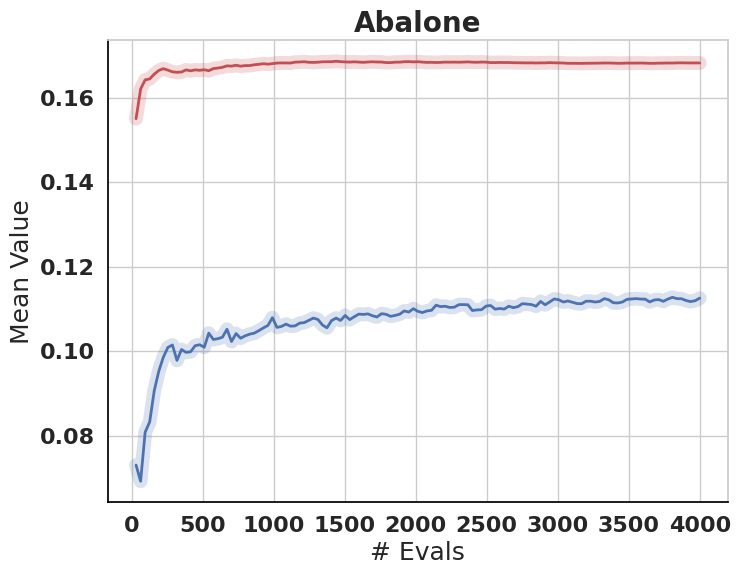

In [38]:
'''Plot the computed similarity scores'''

mean_cos_sim = np.mean(all_cos_sim, axis=0)
mean_spearman_c = np.mean(all_spearman_c, axis=0)

import matplotlib.pyplot as plt  
# Plot the line graph
import seaborn as sb
sb.set(rc={'figure.figsize':(8,6)})
sb.set_theme(style='whitegrid')

plt.plot(all_results['iters'], mean_cos_sim, "r-", linewidth=10, alpha=0.2)
plt.plot(all_results['iters'], mean_spearman_c, "b-", linewidth=10, alpha=0.2)

plt.plot(all_results['iters'], mean_cos_sim, "r-", label='Cosine Similarity', linewidth=2)
plt.plot(all_results['iters'], mean_spearman_c, "b-", label='Spearman Correlation', linewidth=2)

# Add labels and title
plt.xlabel('# Evals', fontsize=18)
plt.ylabel('Mean Value', fontsize=18)
plt.title('Abalone', fontsize=20, fontweight='bold')
#plt.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


ax = plt.gca()

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Display the graph
plt.show()